ROBLOX ANALYSIS -"Does game popularity depend more on genre or on user interaction (likes/favorites)?"

In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [15]:
from sklearn.metrics import confusion_matrix

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv('C:/91/roblox_games.csv')

In [25]:
df.head()

,Rank,Name,Active,Visits,Favourites,Likes,Dislikes,Rating
0,#1,Blox Fruits,"483,372","41,346,317,182","13,574,097","8,521,670","676,846",92.64
1,#2,Brookhaven 🏡RP,"474,141","55,635,148,446","22,117,653","6,108,763","955,845",86.47
2,#3,Dress To Impress 💜,"297,764","3,876,511,994","3,182,036","2,042,092","188,403",91.55
3,#4,PETS GO! ✨ [NEW],"172,411","145,691,211","199,254","275,267","20,140",93.18
4,#5,Murder Mystery 2,"159,531","18,310,453,247","19,306,585","8,001,198","786,705",91.05


In [27]:
df.tail()

,Rank,Name,Active,Visits,Favourites,Likes,Dislikes,Rating
995,#996,[MOBILE/CONSOLE FIXED - BETA] The Time of Ninja,706,"5,136,808","80,497","25,291","2,841",89.90
996,#997,TEAM BORRY PRISON BREAKOUT!👮 [TEAMWORK OBBY],705,"68,323,047","15,351","1,397",586,70.45
997,#998,[👻HALLOWEEN] ADC DANCE STUDIO,704,"11,811,628","8,996","4,344",429,91.01
998,#999,🏈 Field Goal Simulator,703,"43,992,091","411,025","37,371","6,273",85.63
999,#1000,🎃HALLOWEEN🎃 After The Flash: Wintertide,703,"17,272,456","99,057","27,049","5,060",84.24


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   object 
 1   Name        1000 non-null   object 
 2   Active      1000 non-null   object 
 3   Visits      1000 non-null   object 
 4   Favourites  1000 non-null   object 
 5   Likes       1000 non-null   object 
 6   Dislikes    1000 non-null   object 
 7   Rating      1000 non-null   float64
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [31]:
df.describe()

,Rating
count,1000.00000
mean,84.10001
std,11.12230
min,25.55000
25%,79.49500
50%,86.83000
75%,91.99250
max,98.59000


In [33]:
cols = ['Active', 'Visits', 'Favourites', 'Likes', 'Dislikes']
for col in cols:
    df[col] = df[col].str.replace(',', '').astype(float)

In [35]:
df.dropna(inplace=True)

In [37]:
df['Total_Interactions'] = df['Likes'] + df['Favourites']

C:\Users\Trushna\AppData\Local\Temp\ipykernel_17256\1316950529.py:9: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Trushna\AppData\Local\Temp\ipykernel_17256\1316950529.py:9: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Trushna\AppData\Local\Temp\ipykernel_17256\1316950529.py:9: UserWarning: Glyph 127875 (\N{JACK-O-LANTERN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Trushna\AppData\Local\Temp\ipykernel_17256\1316950529.py:9: UserWarning: Glyph 129503 (\N{ZOMBIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Trushna\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Trushna\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128156 (\N{PURPLE HEART}

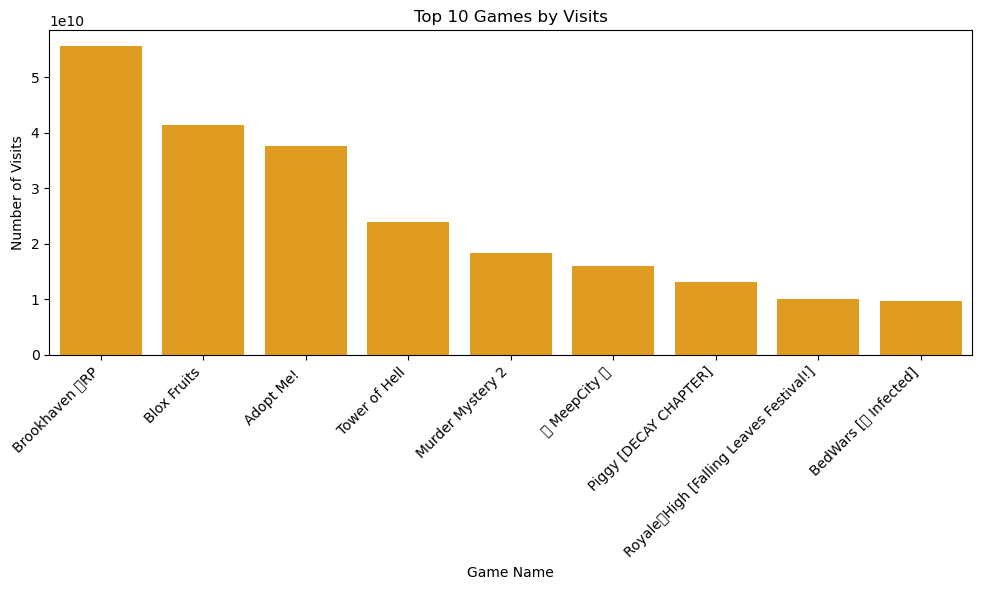

In [41]:
top10 = df.sort_values(by='Visits', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Name', y='Visits', data=top10, color='orange')
plt.title('Top 10 Games by Visits')
plt.xlabel('Game Name')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
df['Visit_Level'] = pd.qcut(df['Visits'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [45]:
visit_counts = df['Visit_Level'].value_counts()

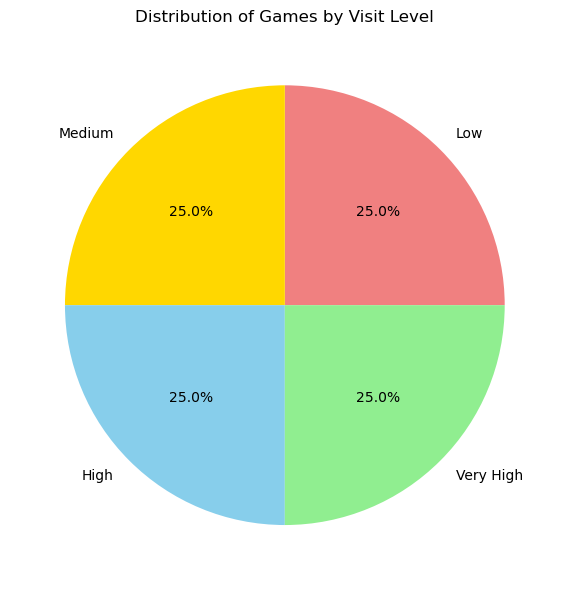

In [47]:
plt.figure(figsize=(6,6))
visit_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'gold', 'skyblue', 'lightgreen'])
plt.title("Distribution of Games by Visit Level")
plt.ylabel("")  # Hides y-axis label
plt.tight_layout()
plt.show()

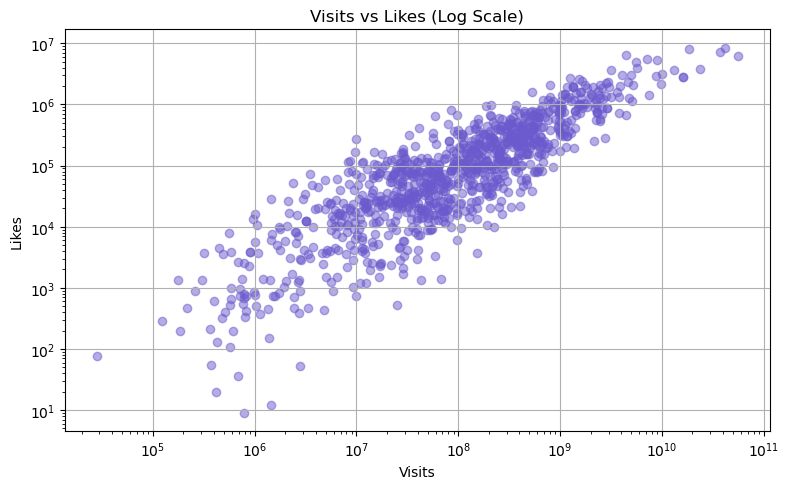

In [49]:
plt.figure(figsize=(8,5))
plt.scatter(df['Visits'], df['Likes'], alpha=0.5, color='slateblue')
plt.xscale('log')
plt.yscale('log')
plt.title('Visits vs Likes (Log Scale)')
plt.xlabel('Visits')
plt.ylabel('Likes')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Trushna\AppData\Local\Temp\ipykernel_17256\3828243516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Visit_Level', y='Likes', data=df, palette='pastel')


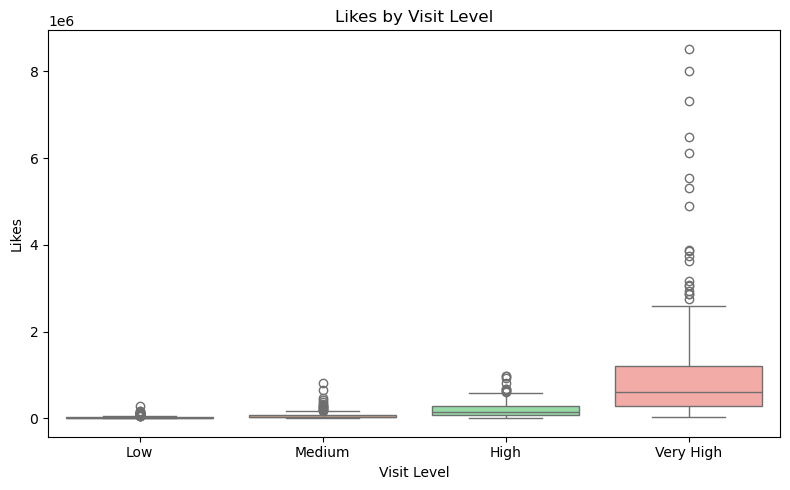

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Visit_Level', y='Likes', data=df, palette='pastel')
plt.title("Likes by Visit Level")
plt.xlabel("Visit Level")
plt.ylabel("Likes")
plt.tight_layout()
plt.show(

In [59]:
numeric_df = df.select_dtypes(include='number')

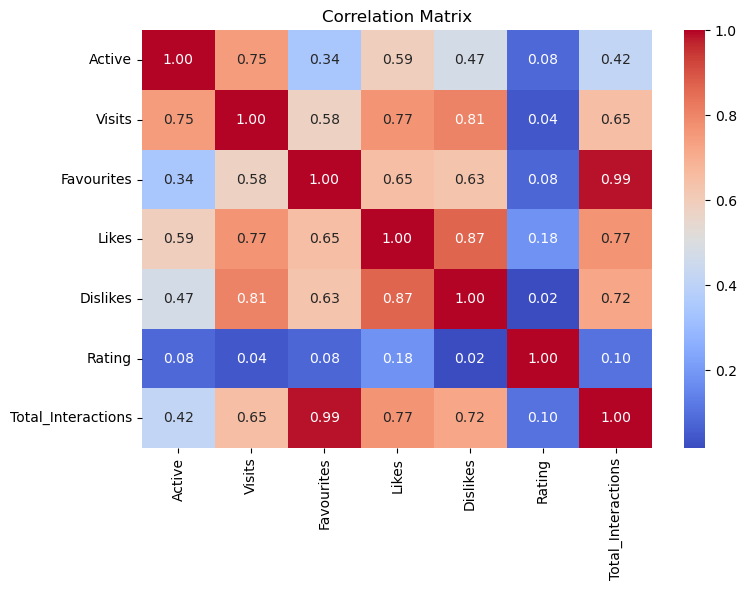

In [61]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [65]:
pip install wordcloud

In [67]:
from wordcloud import WordCloud

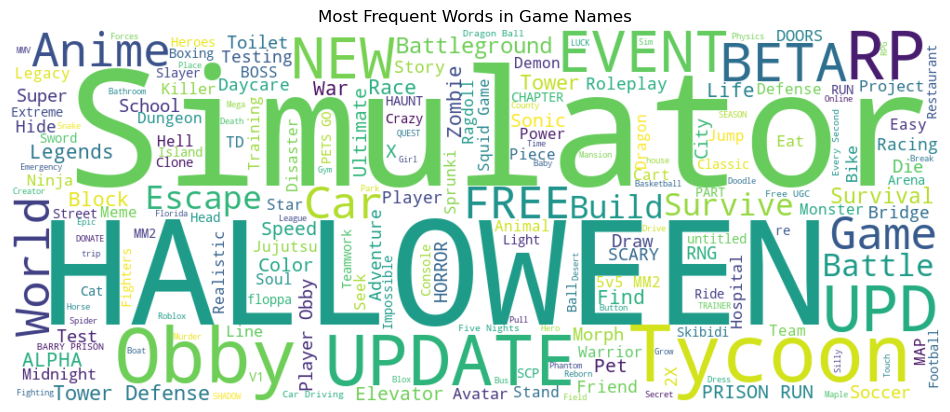

In [73]:
text = " ".join(df['Name'])
wc = WordCloud(width=1000, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Game Names")
plt.show()

## 🔚Conclusion

From the visual analysis of the Roblox games dataset, we can conclude that a game's popularity is more strongly influenced by user interactions—such as the number of likes and favorites—than by its genre. The bar chart and scatter plot clearly showed that games with higher likes and favorites also have more visits, indicating a direct relationship between these metrics. The correlation heatmap confirmed this by showing strong positive correlations among visits, likes, and favorites. The box plot further supported this by highlighting how user interaction varies across games, with a few games having exceptionally high engagement. The pie chart revealed that a small number of games account for most of the platform's overall user activity. These findings suggest that designing games to encourage user engagement can be a more effective strategy for increasing popularity than focusing only on the game’s genre.
